In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga desde un archivo .xlsx sin indice
df= pd.read_excel('Detalle precios y productos fabricados 2022.xlsx')
df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1424 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [5]:
#Realizamos una copia del dataframe
data= df.drop(['FECHA_DOC','CVE_DOC','NOMBRE_VENDEDOR','NOMBRE_CLIENTE','CVE_ART','DESCR'], axis=1)
data

#Creo 2 dataframes para poder procesar los outliers
cuantitativas= data.iloc[ : , 1:23]
cualitativas= data.iloc[ : , [0] ]

<Figure size 1500x800 with 0 Axes>

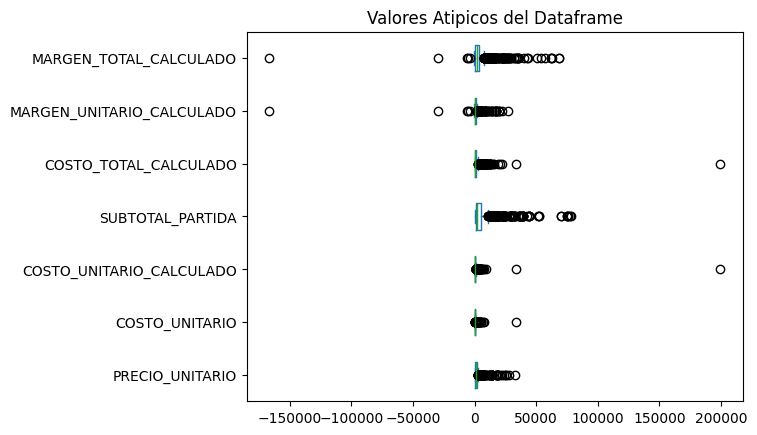

In [6]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibuja el diagrama

In [7]:
#Realizamos una copia del dataframe
data1=df.copy()

#Método aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [8]:
#Obtenemos datos y los outliers se convierten en nulos en el Dataframe
data1= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data1

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [9]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data1.copy()
data_clean=data_clean.fillna(round(data1.mean(),1))
data_clean

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [10]:
#Realizamos una copia del dataframe
data2=data_clean.copy()

#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
dtype: float64


In [11]:
#obtenemos datos limpios del dataframe
data2= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [12]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data3=data2.copy()
data3=data3.fillna(round(data2.mean(),1))
data3

,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...
1421,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [13]:
Datos_limpios = pd.concat([cualitativas, data3], axis=1)
Datos_limpios

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [14]:
#Identificar valores nulos 
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [16]:
Datos_limpios.to_csv("Actividad 4.1 Datos_limpios.csv")